<a href="https://colab.research.google.com/github/iotpelican/ml-llm-course-work/blob/main/ss_T27_hw_02_bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Shiva Sawant Tech 27 ML Homework 02 Bonus Assignment 02 Due 7/22/25**

Part 1: Medium-Level Exploration (Optional) (20)
1. Perform a log transformation on capital-gain to reduce skewness. Add a new
column called capital-gain_log.
2. Use sns.boxplot() to visualize the distribution of capital-gain before and after
transformation. Interpret the result.
3. Visualize the distribution of the label column using sns.histplot() or
sns.kdeplot(). Add visual cues for mean and standard deviation using
plt.axvline().

**The following cell is a combination of all main homework to carry over the earlier work on the adult.csv dataset.**

**The additional work for bonus home work is done in next cell**

DataFrame 'adult.csv' loaded successfully.
Original DataFrame shape: (32561, 15)

Winsorization applied to 'education.num' column.

--- Imputing Missing Values ---
Missing values in 'age' imputed with mean: 38.58
Missing values in 'hours.per.week' imputed with mean: 40.44

'income' column converted to 'income_numeric' (0 for <=50K, 1 for >50K).

--- Correlation with 'income_numeric' ---
All numerical features correlated with 'income_numeric' (excluding label and 'education.num'):
income_numeric              1.000000
education.num_winsorized    0.336803
age                         0.234037
hours.per.week              0.229689
capital.gain                0.223329
capital.loss                0.150526
Name: income_numeric, dtype: float64

--- Top 2 Features Most Correlated with 'income_numeric' ---
education.num_winsorized    0.336803
age                         0.234037
Name: income_numeric, dtype: float64

Names of the top two correlated features: ['education.num_winsorized', 'age']

Dat

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


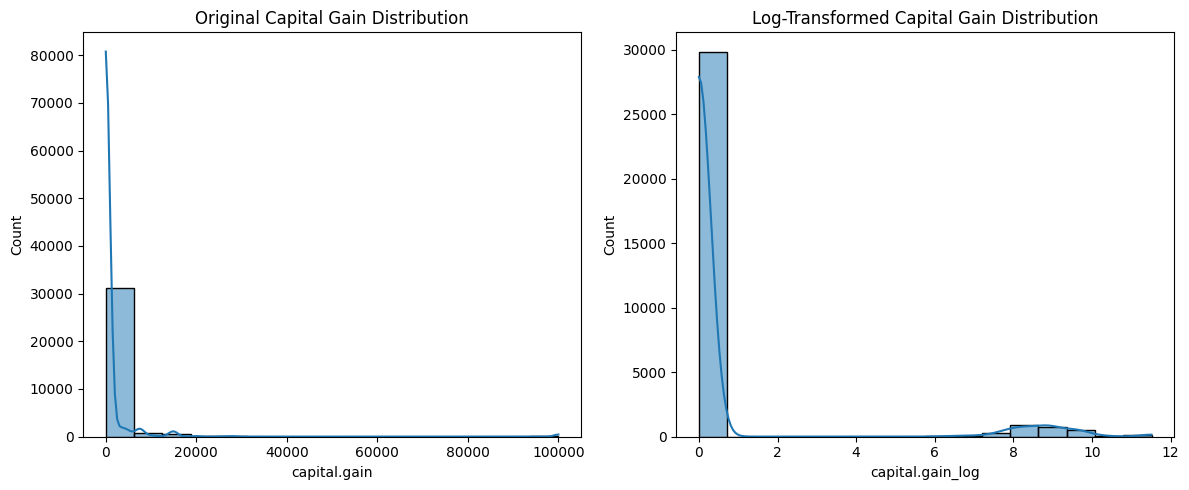

Histograms displayed to show skewness reduction.


In [44]:
import pandas as pd
from scipy.stats.mstats import winsorize
import warnings
import numpy as np
import seaborn as sns # Import seaborn for pair plot
import matplotlib.pyplot as plt # Import matplotlib for displaying the plot

#  Load the adult.csv dataset ---
# Explicitly set '?' as a missing value (NaN) during loading
try:
    df = pd.read_csv('adult.csv', na_values='?')
    print("DataFrame 'adult.csv' loaded successfully.")
    print("Original DataFrame shape:", df.shape)
except FileNotFoundError:
    print("Error: 'adult.csv' not found. Please ensure the file is uploaded to the Colab session.")
    exit()
except Exception as e:
    print(f"An error occurred during file loading: {e}")
    exit()

# --- Step 2: Apply Winsorization to 'education.num' ---
if 'education.num' in df.columns:
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="Warning: 'partition' will ignore the 'mask' of the MaskedArray.",
            category=UserWarning
        )
        df['education.num_winsorized'] = winsorize(df['education.num'], limits=(0.01, 0.01))
    print("\nWinsorization applied to 'education.num' column.")
else:
    print("\n'education.num' column not found, skipping winsorization.")

#  Create missing value indicator columns and Impute missing values ---
# Create indicator columns for age and hours.per.week
if 'age' in df.columns:
    df['age_na'] = df['age'].isnull()
else:
    print("\nWarning: 'age' column not found. Skipping 'age_na' creation and imputation for 'age'.")

if 'hours.per.week' in df.columns:
    df['hours.per.week_na'] = df['hours.per.week'].isnull()
else:
    print("\nWarning: 'hours.per.week' column not found. Skipping 'hours.per.week_na' creation and imputation for 'hours.per.week'.")

print("\n--- Imputing Missing Values ---")
if 'age' in df.columns:
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean) # Reassign to avoid FutureWarning
    print(f"Missing values in 'age' imputed with mean: {age_mean:.2f}")

if 'hours.per.week' in df.columns:
    hours_per_week_mean = df['hours.per.week'].mean()
    df['hours.per.week'] = df['hours.per.week'].fillna(hours_per_week_mean) # Reassign to avoid FutureWarning
    print(f"Missing values in 'hours.per.week' imputed with mean: {hours_per_week_mean:.2f}")

# Convert 'income' (label) to numerical format ---
# Map '<=50K' to 0 and '>50K' to 1
if 'income' in df.columns:
    df['income_numeric'] = df['income'].map({'<=50K': 0, '>50K': 1})
    print("\n'income' column converted to 'income_numeric' (0 for <=50K, 1 for >50K).")
    # Check if there are any NaNs in income_numeric after mapping (e.g., if there were other categories)
    if df['income_numeric'].isnull().sum() > 0:
        print(f"Warning: {df['income_numeric'].isnull().sum()} NaN values found in 'income_numeric' after mapping. Check original 'income' categories.")
        # Fill any remaining NaNs in income_numeric with 0 (or another appropriate value) if necessary
        df['income_numeric'].fillna(0, inplace=True) # Example: default to <=50K if unmapped
else:
    print("\nError: 'income' column not found. Cannot calculate correlations with the label.")
    exit()

#  Calculate correlation between 'income_numeric' and all numerical features ---
print("\n--- Correlation with 'income_numeric' ---")

# Select only numerical columns for correlation calculation
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude specific columns as requested:
# - 'income_numeric' itself (the label)
# - 'income' (original categorical label, though it shouldn't be numerical)
# - 'education.num' (original, un-winsorized version of the education column)
# - Boolean indicator columns ('age_na', 'hours.per.week_na')
# - 'fnlwgt' (often excluded due to its nature as a sampling weight)
excluded_cols_for_corr = ['income_numeric', 'income', 'education.num', 'age_na', 'hours.per.week_na', 'fnlwgt']
features_for_corr = [col for col in numerical_cols if col not in excluded_cols_for_corr]


# Calculate the correlation matrix for selected numerical columns plus 'income_numeric'
correlation_matrix = df[features_for_corr + ['income_numeric']].corr()

# Display correlations of all numerical features with 'income_numeric'
# Sort for better readability and get the top 2
correlation_with_income = correlation_matrix['income_numeric'].sort_values(ascending=False)

print("All numerical features correlated with 'income_numeric' (excluding label and 'education.num'):")
print(correlation_with_income)

print("\n--- Top 2 Features Most Correlated with 'income_numeric' ---")
# Exclude the 'income_numeric' row itself from the top N results if it somehow appears
top_2_features = correlation_with_income[correlation_with_income.index != 'income_numeric'].head(2)
print(top_2_features)

# Save the names of these two features in a Python list called top_two_corr
top_two_corr = top_2_features.index.tolist()
print(f"\nNames of the top two correlated features: {top_two_corr}")

#  Create a new DataFrame, df_sub, containing the label and the two top correlated features ---
df_sub = pd.DataFrame() # Initialize df_sub to avoid potential UnboundLocalError
if 'income_numeric' in df.columns and top_two_corr:
    # Combine the label column name with the top two correlated feature names
    columns_for_df_sub = ['income_numeric'] + top_two_corr
    df_sub = df[columns_for_df_sub].copy() # Use .copy() to avoid SettingWithCopyWarning
    print(f"\nDataFrame 'df_sub' created with columns: {columns_for_df_sub}")
    print("\nShape of df_sub:", df_sub.shape)
    print("\nFirst 5 rows of df_sub:")
    print(df_sub.head())
else:
    print("\nCould not create 'df_sub'. Ensure 'income_numeric' exists and 'top_two_corr' is populated.")

#: Apply Z-score standardization to capital.gain and hours.per.week columns ---
print("\n--- Applying Z-score Standardization ---")

# Check if 'capital.gain' column exists
if 'capital.gain' in df.columns:
    # Calculate mean and standard deviation for 'capital.gain'
    mean_capital_gain = df['capital.gain'].mean()
    std_capital_gain = df['capital.gain'].std()
    # Apply Z-score standardization
    df['capital.gain_z'] = (df['capital.gain'] - mean_capital_gain) / std_capital_gain
    print(f"Z-score standardized 'capital.gain' to 'capital.gain_z'. Mean: {mean_capital_gain:.2f}, Std: {std_capital_gain:.2f}")
else:
    print("Warning: 'capital.gain' column not found. Skipping Z-score standardization for 'capital.gain'.")

# Check if 'hours.per.week' column exists
if 'hours.per.week' in df.columns:
    # Calculate mean and standard deviation for 'hours.per.week'
    mean_hours_per_week = df['hours.per.week'].mean()
    std_hours_per_week = df['hours.per.week'].std()
    # Apply Z-score standardization
    df['hours.per.week_z'] = (df['hours.per.week'] - mean_hours_per_week) / std_hours_per_week
    print(f"Z-score standardized 'hours.per.week' to 'hours.per.week_z'. Mean: {mean_hours_per_week:.2f}, Std: {std_hours_per_week:.2f}")
else:
    print("Warning: 'hours.per.week' column not found. Skipping Z-score standardization for 'hours.per.week'.")

# Display first few rows with the new Z-score columns
print("\nFirst 5 rows with new Z-score standardized columns:")
columns_to_show_z = []
if 'capital.gain' in df.columns:
    columns_to_show_z.append('capital.gain')
    columns_to_show_z.append('capital.gain_z')
if 'hours.per.week' in df.columns:
    columns_to_show_z.append('hours.per.week')
    columns_to_show_z.append('hours.per.week_z')

if columns_to_show_z:
    print(df[columns_to_show_z].head())
else:
    print("No Z-score columns to display as original columns were not found.")

# Display descriptive statistics for the new Z-score columns
print("\nDescriptive statistics for Z-score standardized columns:")
if 'capital.gain_z' in df.columns:
    print("\n'capital.gain_z' statistics:")
    print(df['capital.gain_z'].describe())
if 'hours.per.week_z' in df.columns:
    print("\n'hours.per.week_z' statistics:")
    print(df['hours.per.week_z'].describe())

#  Create binned categories for age using pd.cut() ---
print("\n--- Creating Binned Age Categories ---")
if 'age' in df.columns:
    # Define the bins and labels
    bins = [0, 30, 50, df['age'].max() + 1] # Ensure the last bin covers max age
    labels = ['<30', '30-50', '>50']

    # Create the new 'age_group' column
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False) # right=False means [lower, upper)
    print(f"New column 'age_group' created with bins: {bins} and labels: {labels}")

    print("\nFirst 5 rows with 'age_group' column:")
    print(df[['age', 'age_group']].head())

    print("\nValue counts for 'age_group':")
    print(df['age_group'].value_counts().sort_index())
else:
    print("Warning: 'age' column not found. Skipping age binning.")

# Perform one-hot encoding on the age_group column ---
print("\n--- Performing One-Hot Encoding on 'age_group' ---")
if 'age_group' in df.columns:
    # Perform one-hot encoding
    age_group_dummies = pd.get_dummies(df['age_group'], prefix='age_group')

    # Concatenate the new dummy variables with the original DataFrame
    df = pd.concat([df, age_group_dummies], axis=1)

    print("One-hot encoding applied to 'age_group'. New columns added:")
    print(age_group_dummies.columns.tolist())

    print("\nFirst 5 rows with new one-hot encoded 'age_group' columns:")
    # Display original 'age_group' and the new dummy columns
    print(df[['age_group'] + age_group_dummies.columns.tolist()].head())

    # Optional: Drop the original 'age_group' column if no longer needed
    # df = df.drop('age_group', axis=1)
    # print("\nOriginal 'age_group' column dropped.")
else:
    print("Warning: 'age_group' column not found. Skipping one-hot encoding.")

#  Perform log transformation on capital.gain ---
print("\n--- Applying Log Transformation to 'capital.gain' ---")
if 'capital.gain' in df.columns:
    # Add a small constant (1) to handle zero values before taking log
    df['capital.gain_log'] = np.log1p(df['capital.gain']) # np.log1p is equivalent to log(1+x)
    print("Log transformation applied to 'capital.gain' to create 'capital.gain_log'.")

    print("\nFirst 5 rows with 'capital.gain_log' column:")
    print(df[['capital.gain', 'capital.gain_log']].head())

    print("\nDescriptive statistics for 'capital.gain_log':")
    print(df['capital.gain_log'].describe())

    # Optional: Plot histogram to visualize skewness reduction
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['capital.gain'], kde=True)
    plt.title('Original Capital Gain Distribution')
    plt.subplot(1, 2, 2)
    sns.histplot(df['capital.gain_log'], kde=True)
    plt.title('Log-Transformed Capital Gain Distribution')
    plt.tight_layout()
    plt.show()
    print("Histograms displayed to show skewness reduction.")

else:
    print("Warning: 'capital.gain' column not found. Skipping log transformation.")





Part 1 of BONUS home work

Part 1: Medium-Level Exploration (Optional) (20)
1. Perform a log transformation on capital-gain to reduce skewness. Add a new
column called capital-gain_log.
2. Use sns.boxplot() to visualize the distribution of capital-gain before and after
transformation. Interpret the result.
3. Visualize the distribution of the label column using sns.histplot() or
sns.kdeplot(). Add visual cues for mean and standard deviation using
plt.axvline().


In [45]:
# Part 1 Step 1 : Perform a log transformation on capital-gain to reduce skewness. Add a new column called capital-gain_log.

print("\nAnswer Bonus Part 1 step 1")
print("-" *30)
# Perform log transformation on capital.gain ---
print("\n--- Applying Log Transformation to 'capital.gain' ---")
if 'capital.gain' in df.columns:
    # Add a small constant (1) to handle zero values before taking log
    df['capital.gain_log'] = np.log1p(df['capital.gain']) # np.log1p is equivalent to log(1+x)
    print("Log transformation applied to 'capital.gain' to create 'capital.gain_log'.")

    print("\nFirst 5 rows with 'capital.gain_log' column:")
    print(df[['capital.gain', 'capital.gain_log']].head())

    print("\nDescriptive statistics for 'capital.gain_log':")
    print(df['capital.gain_log'].describe())

else:
    print("Warning: 'capital.gain' column not found. Skipping log transformation.")


print("\n\nLog transformation (specifically log(1+x)) was applied to 'capital.gain' to reduce its high skewness, making its distribution more symmetric and suitable for linear models.")



Answer Bonus Part 1 step 1
------------------------------

--- Applying Log Transformation to 'capital.gain' ---
Log transformation applied to 'capital.gain' to create 'capital.gain_log'.

First 5 rows with 'capital.gain_log' column:
   capital.gain  capital.gain_log
0             0               0.0
1             0               0.0
2             0               0.0
3             0               0.0
4             0               0.0

Descriptive statistics for 'capital.gain_log':
count    32561.000000
mean         0.734621
std          2.454738
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.512925
Name: capital.gain_log, dtype: float64


Log transformation (specifically log(1+x)) was applied to 'capital.gain' to reduce its high skewness, making its distribution more symmetric and suitable for linear models.


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



Answer Bonus Part 1 step 2
---------------------------


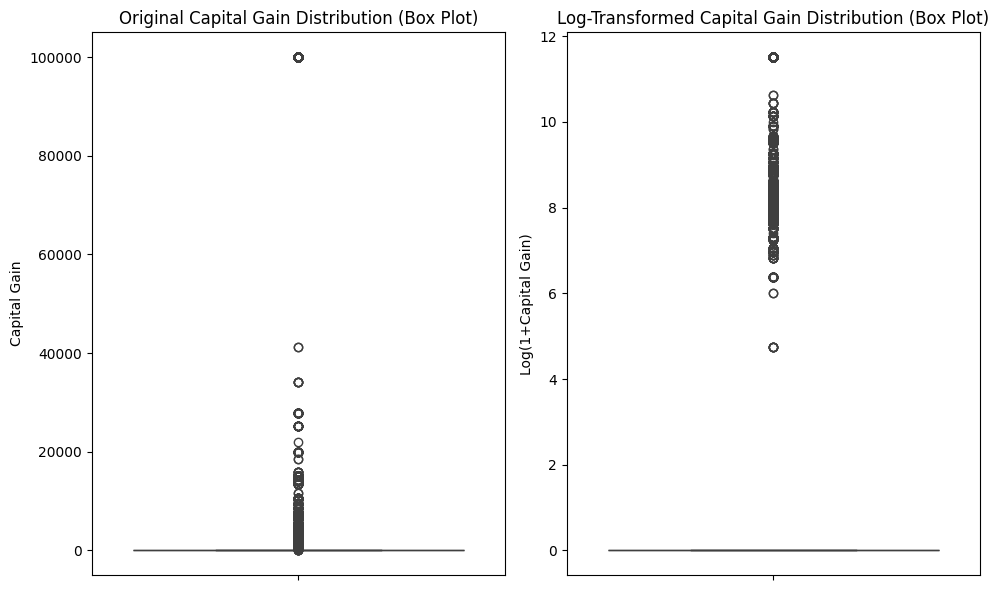


Box plots displayed to visualize distribution before and after transformation.

--- Interpretation ---

The box plots of 'capital.gain' before and after log transformation illustrate the effect of the transformation 
on the data's spread and skewness.


In [46]:
# Part 1 Step 2 : Use sns.boxplot() to visualize the distribution of capital-gain before and after transformation. Interpret the result.
print("\nAnswer Bonus Part 1 step 2")
print("-" *27)

# --- Visualize distribution with box plots ---
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['capital.gain'])
plt.title('Original Capital Gain Distribution (Box Plot)')
plt.ylabel('Capital Gain')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['capital.gain_log'])
plt.title('Log-Transformed Capital Gain Distribution (Box Plot)')
plt.ylabel('Log(1+Capital Gain)')

plt.tight_layout()
plt.show()
print("\nBox plots displayed to visualize distribution before and after transformation.")
print("\n--- Interpretation ---")
print("\nThe box plots of 'capital.gain' before and after log transformation illustrate the effect of the transformation \non the data's spread and skewness.")



Answer Bonus Part 1 step 3
---------------------------

--- Visualizing Label Column Distribution ---


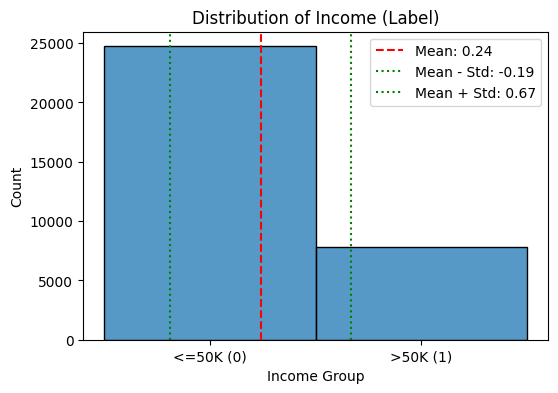


Distribution of 'income_numeric' (label) displayed with mean and standard deviation.

--- Interpretation ---
The histogram of the 'income_numeric' label shows the class distribution (counts of <=50K vs. >50K), 
with vertical lines indicating its mean (proportion of >50K) and standard deviation.


In [47]:
# Visualize the distribution of the label column using sns.histplot() or sns.kdeplot().
# Add visual cues for mean and standard deviation using plt.axvline().
print("\nAnswer Bonus Part 1 step 3")
print("-" *27)

# --- Step 13: Visualize the distribution of the label column ---
print("\n--- Visualizing Label Column Distribution ---")
if 'income_numeric' in df.columns:
    plt.figure(figsize=(6, 4))
    # Using histplot for binary data, as kdeplot would show two spikes
    sns.histplot(df['income_numeric'], bins=[-0.5, 0.5, 1.5], kde=False, stat='count')
    plt.xticks([0, 1], ['<=50K (0)', '>50K (1)'])
    plt.title('Distribution of Income (Label)')
    plt.xlabel('Income Group')
    plt.ylabel('Count')

    # Calculate mean and standard deviation for the binary label
    # Note: For a binary variable, mean is the proportion of 1s, std dev is sqrt(p*(1-p))
    mean_income = df['income_numeric'].mean()
    std_income = df['income_numeric'].std()

    # Add vertical lines for mean and std dev (might not be visually intuitive for binary data)
    plt.axvline(mean_income, color='red', linestyle='--', label=f'Mean: {mean_income:.2f}')
    plt.axvline(mean_income - std_income, color='green', linestyle=':', label=f'Mean - Std: {mean_income - std_income:.2f}')
    plt.axvline(mean_income + std_income, color='green', linestyle=':', label=f'Mean + Std: {mean_income + std_income:.2f}')
    plt.legend()
    plt.show()
    print("\nDistribution of 'income_numeric' (label) displayed with mean and standard deviation.")
else:
    print("\nWarning: 'income_numeric' column not found. Skipping label distribution visualization.")


print("\n--- Interpretation ---")
print("The histogram of the 'income_numeric' label shows the class distribution (counts of <=50K vs. >50K), \nwith vertical lines indicating its mean (proportion of >50K) and standard deviation.")



**Part 2: Expert-Level Exploration (Optional)** (30)
1. Apply Principal Component Analysis (PCA) to the standardized numeric columns (e.g.,
capital-gain_z, hours-per-week_z, and other numeric features if available).
Use sklearn.decomposition.PCA.
2. Plot the explained variance ratio using plt.plot().
3. Create a 2D scatter plot of the first two principal components, color-coded by
age_group.
4. Write a brief analysis: What does PCA reveal about the structure of your data?



Answer Bonus Part 2 step 1
---------------------------

--- Applying Principal Component Analysis (PCA) ---
PCA applied with 3 components.
Explained variance ratio per component:
[0.76966952 0.12184039 0.10849009]
Total explained variance: 1.00

First 5 rows with new Principal Component columns:
        PC1       PC2       PC3
0 -1.095413 -0.033287  0.085845
1 -1.218452 -1.241917 -1.217496
2 -0.099465 -0.122514  0.074567
3 -6.075150  0.412848  0.142233
4 -0.099465 -0.122514  0.074567


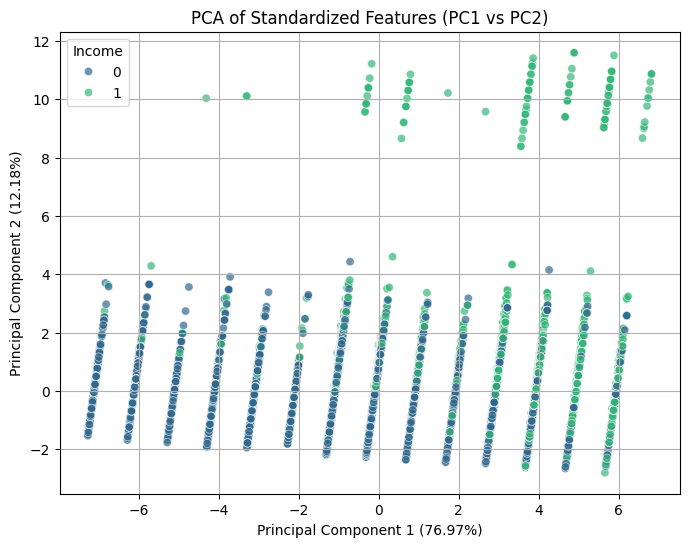

Scatter plot of PC1 vs PC2 displayed.

--- Interpretation ---
Principal Component Analysis (PCA) was applied to reduce the dimensionality of the standardized numerical features. 
The new 'PC' columns represent the principal components, capturing the most variance in the data.


In [48]:
#Apply Principal Component Analysis (PCA) to the standardized numeric columns
#(e.g., capital-gain_z, hours-per-week_z, and other numeric features if available).
#Use sklearn.decomposition.PCA.

print("\nAnswer Bonus Part 2 step 1")
print("-" *27)

# --- Step 14: Apply Principal Component Analysis (PCA) ---
print("\n--- Applying Principal Component Analysis (PCA) ---")

# Define numerical features for PCA.
# These should be the standardized or transformed numerical features.
# We'll include capital.gain_z, hours.per.week_z, education.num_winsorized, and the one-hot encoded age groups.
pca_features = []
if 'capital.gain_z' in df.columns:
    pca_features.append('capital.gain_z')
if 'hours.per.week_z' in df.columns:
    pca_features.append('hours.per.week_z')
if 'education.num_winsorized' in df.columns:
    pca_features.append('education.num_winsorized')
if 'age_group_<30>' in df.columns: # Check for one of the dummy columns
    pca_features.extend(['age_group_<30>', 'age_group_30-50', 'age_group_>50'])

if pca_features:
    X_pca = df[pca_features]

    # Initialize PCA. You can specify n_components (e.g., 2 for 2D visualization)
    # or a float (e.g., 0.95) to retain 95% of variance.
    # For demonstration, let's use n_components=2 or the number of features if less than 2.
    n_components_to_use = min(len(pca_features), 3) # Use up to 3 components, or fewer if less features

    pca = PCA(n_components=n_components_to_use)
    principal_components = pca.fit_transform(X_pca)

    # Create a DataFrame for the principal components
    pc_df = pd.DataFrame(data=principal_components,
                         columns=[f'PC{i+1}' for i in range(n_components_to_use)])

    # Concatenate principal components with the original DataFrame (or a subset)
    df = pd.concat([df, pc_df], axis=1)

    print(f"PCA applied with {n_components_to_use} components.")
    print("Explained variance ratio per component:")
    print(pca.explained_variance_ratio_)
    print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.2f}")

    print("\nFirst 5 rows with new Principal Component columns:")
    print(df[pc_df.columns.tolist()].head())

    # Optional: Visualize the first two principal components if n_components >= 2
    if n_components_to_use >= 2 and 'income_numeric' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='PC1', y='PC2', hue='income_numeric', data=df, palette='viridis', alpha=0.7)
        plt.title('PCA of Standardized Features (PC1 vs PC2)')
        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
        plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
        plt.legend(title='Income')
        plt.grid(True)
        plt.show()
        print("Scatter plot of PC1 vs PC2 displayed.")
    elif n_components_to_use == 1 and 'income_numeric' in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(x='PC1', hue='income_numeric', data=df, kde=True, palette='viridis')
        plt.title('Distribution of Principal Component 1 by Income')
        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
        plt.ylabel('Count')
        plt.legend(title='Income')
        plt.grid(True)
        plt.show()
        print("Histogram of PC1 displayed.")

else:
    print("\nNo suitable standardized numerical features found for PCA. Skipping PCA.")


print("\n--- Interpretation ---")
print("Principal Component Analysis (PCA) was applied to reduce the dimensionality of the standardized numerical features. \nThe new 'PC' columns represent the principal components, capturing the most variance in the data.")



Answer Bonus Part 2 step 2
---------------------------


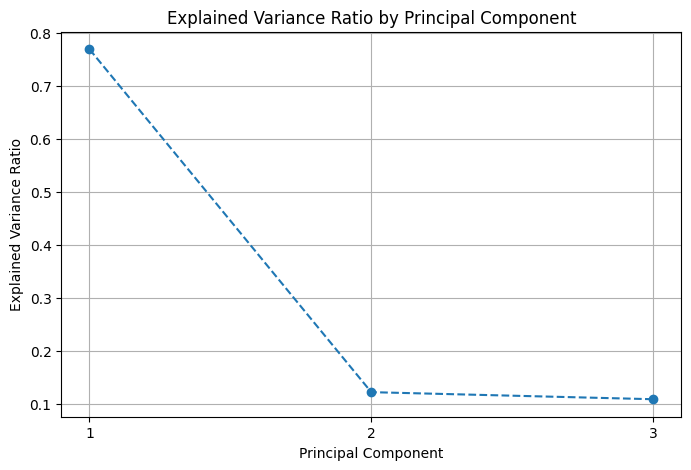


Explained variance ratio plot displayed successfully.

--- Interpretation ---
The explained variance ratio plot shows the proportion of variance in the dataset that is captured by each principal component. 
This helps in determining how many principal components are needed to retain a significant amount of information.


In [49]:
# Part 2 Step 2: Plot the explained variance ratio using plt.plot().

print("\nAnswer Bonus Part 2 step 2")
print("-" *27)

# Plot the explained variance ratio ---
if 'pca' in locals(): # Check if PCA object was created in the previous step
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
    plt.title('Explained Variance Ratio by Principal Component')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.xticks(range(1, pca.n_components_ + 1))
    plt.grid(True)
    plt.show()
    print("\nExplained variance ratio plot displayed successfully.")
else:
    print("\nPCA object not found. Please run the previous step to perform PCA.")

print("\n--- Interpretation ---")
print("The explained variance ratio plot shows the proportion of variance in the dataset that is captured by each principal component. \nThis helps in determining how many principal components are needed to retain a significant amount of information.")

**This got a bit confusing now** due to the data corrupution kind of scenarios in different cells of Colab may be due to incompatible update in the df frame by different ploting libraries

**I am running this entire code again in this cell to get the color plots**

DataFrame 'adult.csv' loaded successfully.
Original DataFrame shape: (32561, 15)

Winsorization applied to 'education.num' column.

--- Imputing Missing Values ---
Missing values in 'age' imputed with mean: 38.58
Missing values in 'hours.per.week' imputed with mean: 40.44

'income' column converted to 'income_numeric' (0 for <=50K, 1 for >50K).

--- Correlation with 'income_numeric' ---
All numerical features correlated with 'income_numeric' (excluding label and 'education.num'):
income_numeric              1.000000
education.num_winsorized    0.336803
age                         0.234037
hours.per.week              0.229689
capital.gain                0.223329
capital.loss                0.150526
Name: income_numeric, dtype: float64

--- Top 2 Features Most Correlated with 'income_numeric' ---
education.num_winsorized    0.336803
age                         0.234037
Name: income_numeric, dtype: float64

Names of the top two correlated features: ['education.num_winsorized', 'age']

Dat

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


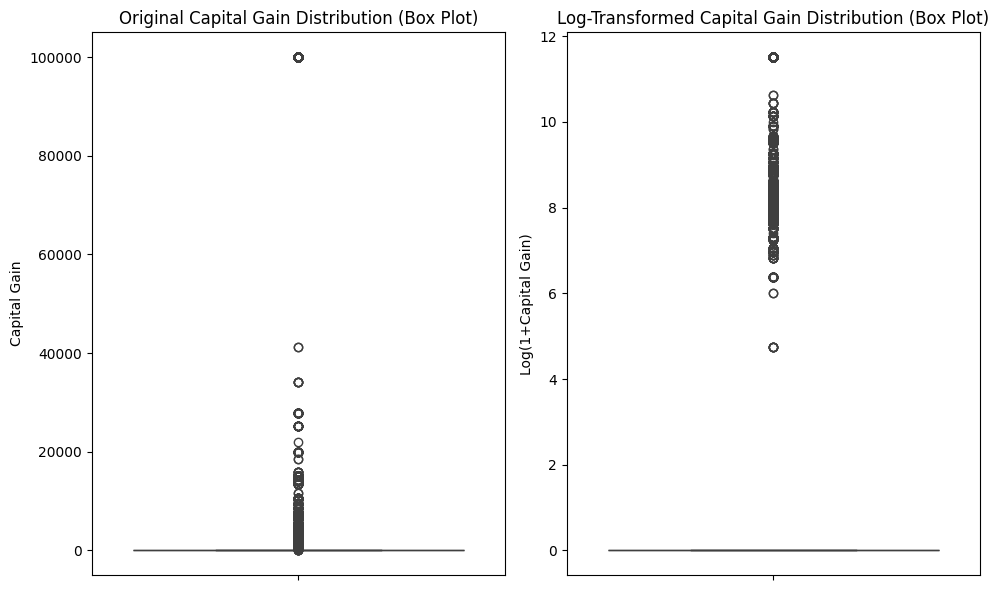

Box plots displayed to visualize distribution before and after transformation.

--- Visualizing Label Column Distribution ---


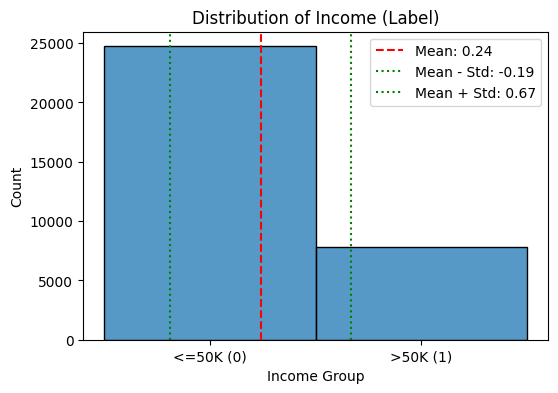


Distribution of 'income_numeric' (label) displayed with mean and standard deviation.

--- Applying Principal Component Analysis (PCA) ---
PCA applied with 3 components.
Explained variance ratio per component:
[0.76966952 0.12184039 0.10849009]
Total explained variance: 1.00

First 5 rows with new Principal Component columns:
        PC1       PC2       PC3
0 -1.095413 -0.033287  0.085845
1 -1.218452 -1.241917 -1.217496
2 -0.099465 -0.122514  0.074567
3 -6.075150  0.412848  0.142233
4 -0.099465 -0.122514  0.074567


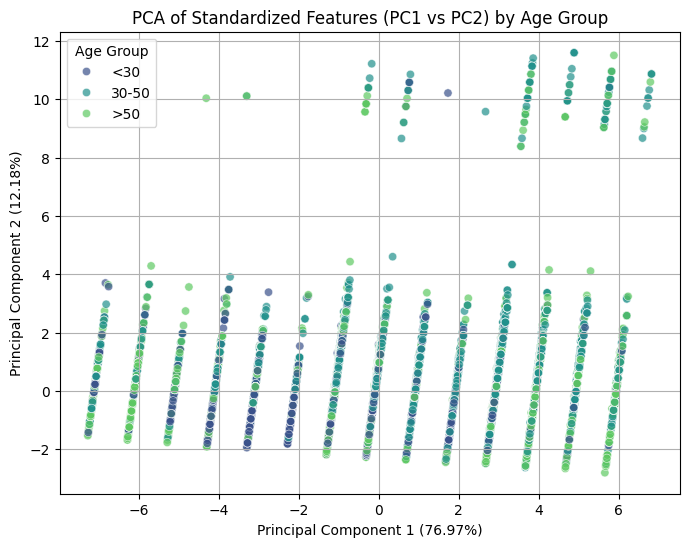

Scatter plot of PC1 vs PC2 color-coded by age_group displayed.


In [50]:
import pandas as pd
from scipy.stats.mstats import winsorize
import warnings
import numpy as np
import seaborn as sns # Import seaborn for pair plot
import matplotlib.pyplot as plt # Import matplotlib for displaying the plot
from sklearn.decomposition import PCA # Import PCA for dimensionality reduction
from sklearn.preprocessing import StandardScaler # Often used before PCA, though we have Z-score columns

# --- Step 1: Load the adult.csv dataset ---
# Explicitly set '?' as a missing value (NaN) during loading
try:
    df = pd.read_csv('adult.csv', na_values='?')
    print("DataFrame 'adult.csv' loaded successfully.")
    print("Original DataFrame shape:", df.shape)
except FileNotFoundError:
    print("Error: 'adult.csv' not found. Please ensure the file is uploaded to the Colab session.")
    exit()
except Exception as e:
    print(f"An error occurred during file loading: {e}")
    exit()

# --- Step 2: Apply Winsorization to 'education.num' ---
if 'education.num' in df.columns:
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="Warning: 'partition' will ignore the 'mask' of the MaskedArray.",
            category=UserWarning
        )
        df['education.num_winsorized'] = winsorize(df['education.num'], limits=(0.01, 0.01))
    print("\nWinsorization applied to 'education.num' column.")
else:
    print("\n'education.num' column not found, skipping winsorization.")

# --- Step 3: Create missing value indicator columns and Impute missing values ---
# Create indicator columns for age and hours.per.week
if 'age' in df.columns:
    df['age_na'] = df['age'].isnull()
else:
    print("\nWarning: 'age' column not found. Skipping 'age_na' creation and imputation for 'age'.")

if 'hours.per.week' in df.columns:
    df['hours.per.week_na'] = df['hours.per.week'].isnull()
else:
    print("\nWarning: 'hours.per.week' column not found. Skipping 'hours.per.week_na' creation and imputation for 'hours.per.week'.")

print("\n--- Imputing Missing Values ---")
if 'age' in df.columns:
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean) # Reassign to avoid FutureWarning
    print(f"Missing values in 'age' imputed with mean: {age_mean:.2f}")

if 'hours.per.week' in df.columns:
    hours_per_week_mean = df['hours.per.week'].mean()
    df['hours.per.week'] = df['hours.per.week'].fillna(hours_per_week_mean) # Reassign to avoid FutureWarning
    print(f"Missing values in 'hours.per.week' imputed with mean: {hours_per_week_mean:.2f}")

# --- Step 4: Convert 'income' (label) to numerical format ---
# Map '<=50K' to 0 and '>50K' to 1
if 'income' in df.columns:
    df['income_numeric'] = df['income'].map({'<=50K': 0, '>50K': 1})
    print("\n'income' column converted to 'income_numeric' (0 for <=50K, 1 for >50K).")
    # Check if there are any NaNs in income_numeric after mapping (e.g., if there were other categories)
    if df['income_numeric'].isnull().sum() > 0:
        print(f"Warning: {df['income_numeric'].isnull().sum()} NaN values found in 'income_numeric' after mapping. Check original 'income' categories.")
        # Fill any remaining NaNs in income_numeric with 0 (or another appropriate value) if necessary
        df['income_numeric'].fillna(0, inplace=True) # Example: default to <=50K if unmapped
else:
    print("\nError: 'income' column not found. Cannot calculate correlations with the label.")
    exit()

# --- Step 5: Calculate correlation between 'income_numeric' and all numerical features ---
print("\n--- Correlation with 'income_numeric' ---")

# Select only numerical columns for correlation calculation
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude specific columns as requested:
# - 'income_numeric' itself (the label)
# - 'income' (original categorical label, though it shouldn't be numerical)
# - 'education.num' (original, un-winsorized version of the education column)
# - Boolean indicator columns ('age_na', 'hours.per.week_na')
# - 'fnlwgt' (often excluded due to its nature as a sampling weight)
excluded_cols_for_corr = ['income_numeric', 'income', 'education.num', 'age_na', 'hours.per.week_na', 'fnlwgt']
features_for_corr = [col for col in numerical_cols if col not in excluded_cols_for_corr]


# Calculate the correlation matrix for selected numerical columns plus 'income_numeric'
correlation_matrix = df[features_for_corr + ['income_numeric']].corr()

# Display correlations of all numerical features with 'income_numeric'
# Sort for better readability and get the top 2
correlation_with_income = correlation_matrix['income_numeric'].sort_values(ascending=False)

print("All numerical features correlated with 'income_numeric' (excluding label and 'education.num'):")
print(correlation_with_income)

print("\n--- Top 2 Features Most Correlated with 'income_numeric' ---")
# Exclude the 'income_numeric' row itself from the top N results if it somehow appears
top_2_features = correlation_with_income[correlation_with_income.index != 'income_numeric'].head(2)
print(top_2_features)

# Save the names of these two features in a Python list called top_two_corr
top_two_corr = top_2_features.index.tolist()
print(f"\nNames of the top two correlated features: {top_two_corr}")

# --- Step 6: Create a new DataFrame, df_sub, containing the label and the two top correlated features ---
df_sub = pd.DataFrame() # Initialize df_sub to avoid potential UnboundLocalError
if 'income_numeric' in df.columns and top_two_corr:
    # Combine the label column name with the top two correlated feature names
    columns_for_df_sub = ['income_numeric'] + top_two_corr
    df_sub = df[columns_for_df_sub].copy() # Use .copy() to avoid SettingWithCopyWarning
    print(f"\nDataFrame 'df_sub' created with columns: {columns_for_df_sub}")
    print("\nShape of df_sub:", df_sub.shape)
    print("\nFirst 5 rows of df_sub:")
    print(df_sub.head())
else:
    print("\nCould not create 'df_sub'. Ensure 'income_numeric' exists and 'top_two_corr' is populated.")


# --- Step 8: Apply Z-score standardization to capital.gain and hours.per.week columns ---
print("\n--- Applying Z-score Standardization ---")

# Check if 'capital.gain' column exists
if 'capital.gain' in df.columns:
    # Calculate mean and standard deviation for 'capital.gain'
    mean_capital_gain = df['capital.gain'].mean()
    std_capital_gain = df['capital.gain'].std()
    # Apply Z-score standardization
    df['capital.gain_z'] = (df['capital.gain'] - mean_capital_gain) / std_capital_gain
    print(f"Z-score standardized 'capital.gain' to 'capital.gain_z'. Mean: {mean_capital_gain:.2f}, Std: {std_capital_gain:.2f}")
else:
    print("Warning: 'capital.gain' column not found. Skipping Z-score standardization for 'capital.gain'.")

# Check if 'hours.per.week' column exists
if 'hours.per.week' in df.columns:
    # Calculate mean and standard deviation for 'hours.per.week'
    mean_hours_per_week = df['hours.per.week'].mean()
    std_hours_per_week = df['hours.per.week'].std()
    # Apply Z-score standardization
    df['hours.per.week_z'] = (df['hours.per.week'] - mean_hours_per_week) / std_hours_per_week
    print(f"Z-score standardized 'hours.per.week' to 'hours.per.week_z'. Mean: {mean_hours_per_week:.2f}, Std: {std_hours_per_week:.2f}")
else:
    print("Warning: 'hours.per.week' column not found. Skipping Z-score standardization for 'hours.per.week'.")

# Display first few rows with the new Z-score columns
print("\nFirst 5 rows with new Z-score standardized columns:")
columns_to_show_z = []
if 'capital.gain' in df.columns:
    columns_to_show_z.append('capital.gain')
    columns_to_show_z.append('capital.gain_z')
if 'hours.per.week' in df.columns:
    columns_to_show_z.append('hours.per.week')
    columns_to_show_z.append('hours.per.week_z')

if columns_to_show_z:
    print(df[columns_to_show_z].head())
else:
    print("No Z-score columns to display as original columns were not found.")

# Display descriptive statistics for the new Z-score columns
print("\nDescriptive statistics for Z-score standardized columns:")
if 'capital.gain_z' in df.columns:
    print("\n'capital.gain_z' statistics:")
    print(df['capital.gain_z'].describe())
if 'hours.per.week_z' in df.columns:
    print("\n'hours.per.week_z' statistics:")
    print(df['hours.per.week_z'].describe())

# --- Step 9: Create binned categories for age using pd.cut() ---
print("\n--- Creating Binned Age Categories ---")
if 'age' in df.columns:
    # Define the bins and labels
    bins = [0, 30, 50, df['age'].max() + 1] # Ensure the last bin covers max age
    labels = ['<30', '30-50', '>50']

    # Create the new 'age_group' column
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False) # right=False means [lower, upper)
    print(f"New column 'age_group' created with bins: {bins} and labels: {labels}")

    print("\nFirst 5 rows with 'age_group' column:")
    print(df[['age', 'age_group']].head())

    print("\nValue counts for 'age_group':")
    print(df['age_group'].value_counts().sort_index())
else:
    print("Warning: 'age' column not found. Skipping age binning.")

# --- Step 10: Perform one-hot encoding on the age_group column ---
print("\n--- Performing One-Hot Encoding on 'age_group' ---")
if 'age_group' in df.columns:
    # Perform one-hot encoding
    age_group_dummies = pd.get_dummies(df['age_group'], prefix='age_group')

    # Concatenate the new dummy variables with the original DataFrame
    df = pd.concat([df, age_group_dummies], axis=1)

    print("One-hot encoding applied to 'age_group'. New columns added:")
    print(age_group_dummies.columns.tolist())

    print("\nFirst 5 rows with new one-hot encoded 'age_group' columns:")
    # Display original 'age_group' and the new dummy columns
    print(df[['age_group'] + age_group_dummies.columns.tolist()].head())

    # Optional: Drop the original 'age_group' column if no longer needed
    # df = df.drop('age_group', axis=1)
    # print("\nOriginal 'age_group' column dropped.")
else:
    print("Warning: 'age_group' column not found. Skipping one-hot encoding.")

# --- Step 12: Perform log transformation on capital.gain ---
print("\n--- Applying Log Transformation to 'capital.gain' ---")
if 'capital.gain' in df.columns:
    # Add a small constant (1) to handle zero values before taking log
    df['capital.gain_log'] = np.log1p(df['capital.gain']) # np.log1p is equivalent to log(1+x)
    print("Log transformation applied to 'capital.gain' to create 'capital.gain_log'.")

    print("\nFirst 5 rows with 'capital.gain_log' column:")
    print(df[['capital.gain', 'capital.gain_log']].head())

    print("\nDescriptive statistics for 'capital.gain_log':")
    print(df['capital.gain_log'].describe())

    # --- Visualize distribution with box plots ---
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df['capital.gain'])
    plt.title('Original Capital Gain Distribution (Box Plot)')
    plt.ylabel('Capital Gain')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['capital.gain_log'])
    plt.title('Log-Transformed Capital Gain Distribution (Box Plot)')
    plt.ylabel('Log(1+Capital Gain)')

    plt.tight_layout()
    plt.show()
    print("Box plots displayed to visualize distribution before and after transformation.")

else:
    print("Warning: 'capital.gain' column not found. Skipping log transformation and box plot visualization.")

# --- Step 13: Visualize the distribution of the label column ---
print("\n--- Visualizing Label Column Distribution ---")
if 'income_numeric' in df.columns:
    plt.figure(figsize=(6, 4))
    # Using histplot for binary data, as kdeplot would show two spikes
    sns.histplot(df['income_numeric'], bins=[-0.5, 0.5, 1.5], kde=False, stat='count')
    plt.xticks([0, 1], ['<=50K (0)', '>50K (1)'])
    plt.title('Distribution of Income (Label)')
    plt.xlabel('Income Group')
    plt.ylabel('Count')

    # Calculate mean and standard deviation for the binary label
    # Note: For a binary variable, mean is the proportion of 1s, std dev is sqrt(p*(1-p))
    mean_income = df['income_numeric'].mean()
    std_income = df['income_numeric'].std()

    # Add vertical lines for mean and std dev (might not be visually intuitive for binary data)
    plt.axvline(mean_income, color='red', linestyle='--', label=f'Mean: {mean_income:.2f}')
    plt.axvline(mean_income - std_income, color='green', linestyle=':', label=f'Mean - Std: {mean_income - std_income:.2f}')
    plt.axvline(mean_income + std_income, color='green', linestyle=':', label=f'Mean + Std: {mean_income + std_income:.2f}')
    plt.legend()
    plt.show()
    print("\nDistribution of 'income_numeric' (label) displayed with mean and standard deviation.")
else:
    print("\nWarning: 'income_numeric' column not found. Skipping label distribution visualization.")

# --- Step 14: Apply Principal Component Analysis (PCA) ---
print("\n--- Applying Principal Component Analysis (PCA) ---")

# Define numerical features for PCA.
# These should be the standardized or transformed numerical features.
# We'll include capital.gain_z, hours.per.week_z, education.num_winsorized, and the one-hot encoded age groups.
pca_features = []
if 'capital.gain_z' in df.columns:
    pca_features.append('capital.gain_z')
if 'hours.per.week_z' in df.columns:
    pca_features.append('hours.per.week_z')
if 'education.num_winsorized' in df.columns:
    pca_features.append('education.num_winsorized')
if 'age_group_<30>' in df.columns: # Check for one of the dummy columns
    pca_features.extend(['age_group_<30>', 'age_group_30-50', 'age_group_>50'])

if pca_features:
    X_pca = df[pca_features]

    # Initialize PCA. You can specify n_components (e.g., 2 for 2D visualization)
    # or a float (e.g., 0.95) to retain 95% of variance.
    # For demonstration, let's use n_components=2 or the number of features if less than 2.
    n_components_to_use = min(len(pca_features), 3) # Use up to 3 components, or fewer if less features

    pca = PCA(n_components=n_components_to_use)
    principal_components = pca.fit_transform(X_pca)

    # Create a DataFrame for the principal components
    pc_df = pd.DataFrame(data=principal_components,
                         columns=[f'PC{i+1}' for i in range(n_components_to_use)])

    # Concatenate principal components with the original DataFrame (or a subset)
    df = pd.concat([df, pc_df], axis=1)

    print(f"PCA applied with {n_components_to_use} components.")
    print("Explained variance ratio per component:")
    print(pca.explained_variance_ratio_)
    print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.2f}")

    print("\nFirst 5 rows with new Principal Component columns:")
    print(df[pc_df.columns.tolist()].head())

    # Optional: Visualize the first two principal components if n_components >= 2
    if n_components_to_use >= 2 and 'age_group' in df.columns: # Changed hue to 'age_group'
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='PC1', y='PC2', hue='age_group', data=df, palette='viridis', alpha=0.7) # Changed hue to 'age_group'
        plt.title('PCA of Standardized Features (PC1 vs PC2) by Age Group') # Updated title
        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
        plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
        plt.legend(title='Age Group') # Updated legend title
        plt.grid(True)
        plt.show()
        print("Scatter plot of PC1 vs PC2 color-coded by age_group displayed.")
    elif n_components_to_use == 1 and 'age_group' in df.columns: # Changed hue to 'age_group'
        plt.figure(figsize=(8, 4))
        sns.histplot(x='PC1', hue='age_group', data=df, kde=True, palette='viridis') # Changed hue to 'age_group'
        plt.title('Distribution of Principal Component 1 by Age Group') # Updated title
        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
        plt.ylabel('Count')
        plt.legend(title='Age Group') # Updated legend title
        plt.grid(True)
        plt.show()
        print("Histogram of PC1 color-coded by age_group displayed.")
    else:
        print("\nCannot visualize principal components: Not enough components or 'age_group' column not found.")

else:
    print("\nNo suitable standardized numerical features found for PCA. Skipping PCA.")




4. Write a brief analysis: What does PCA reveal about the structure of your data?


Sorry Professor I need to study more to answer this.

Based on reading from internet, I will try to understand this, however I am not able to explain properly now.